# Basic usage

In [1]:
import sympy as smp
import numpy as np 
import matplotlib.pyplot as plt 

plt.style.use('bmh')

In [2]:
# define variable x

x = smp.symbols('x')

In [3]:
x

x

In [4]:
x**2

x**2

In [5]:
smp.sin(x)

sin(x)

In [6]:
# can store expression inside another variable

y = x**2 + 4*x + 3
y 

x**2 + 4*x + 3

In [7]:
z = y**2
z 

(x**2 + 4*x + 3)**2

In [8]:
# factoring 

z.factor()

(x + 1)**2*(x + 3)**2

In [9]:
# expanding expression

z.expand()

x**4 + 8*x**3 + 22*x**2 + 24*x + 9

# Solve equations

```smp.solve(f, x)```
will find $x$ that makes $f(x) = 0$<br>
Hence, it's important to rearrange the equation so that $f(x) = 0$ 

In [10]:
smp.solve(z, x)

[-3, -1]

In [11]:
smp.solve(x**2 + 1, x)

[-I, I]

In [12]:
# set x to real number only before solve
# to get only real solution

x = smp.symbols('x', real=True)
smp.solve(x**2 + 1, x)

[]

In [13]:
# get both positive/negative solutions

x = smp.symbols('x')
smp.solve(x**2 -5*x -1, x)

[5/2 - sqrt(29)/2, 5/2 + sqrt(29)/2]

In [14]:
# only positive solution

x = smp.symbols('x', positive=True)
smp.solve(x**2 -5*x -1, x)

[5/2 + sqrt(29)/2]

In [15]:
# only negative solution

x = smp.symbols('x', positive=False)
smp.solve(x**2 -5*x -1, x)

[5/2 - sqrt(29)/2]

In [16]:
# define multiple variables at once

x, y, z = smp.symbols('x y z')

In [17]:
F = x**2 + y * smp.sin(z)
F 

x**2 + y*sin(z)

In [18]:
# solve for specific variable

x_sols = smp.solve(F, x)
y_sols = smp.solve(F, y)
z_sols = smp.solve(F, z)

print('x:', x_sols)
print('y:', y_sols)
print('z:', z_sols)

x: [-sqrt(-y*sin(z)), sqrt(-y*sin(z))]
y: [-x**2/sin(z)]
z: [asin(x**2/y) + pi, -asin(x**2/y)]


In [19]:
expr = z_sols[0]
expr

asin(x**2/y) + pi

In [20]:
# turn sympy expression into function

expr_f = smp.lambdify([x, y], expr) # (variables, expression)

In [21]:
expr_f

<function _lambdifygenerated(x, y)>

In [22]:
# x=1, y=2

expr_f(1, 2)

3.6651914291880923

In [23]:
xs = np.linspace(0, 1, 100)

vals = [expr_f(x, 2) for x in xs]

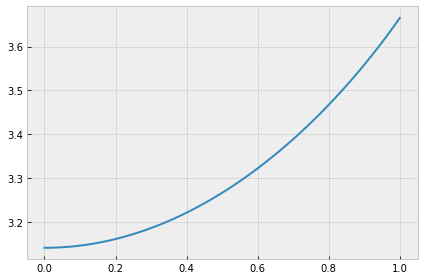

In [24]:
plt.plot(xs, vals)
plt.tight_layout()
plt.show()

In [25]:
x, y, z = smp.symbols('x y z')
F = x**2 + y * smp.sin(z)
F 

x**2 + y*sin(z)

In [26]:
# substitute varible in sympy

# y = cos(z)
# z = y
# subs occur in order

display(F.subs([(y, smp.cos(z)), (z, y)]))

x**2 + sin(y)*cos(y)

**Example** <br>
given two equations, <br>
$$h_o(t) = h_0 - v_0t - \frac{1}{2}gt^2$$ <br>
$$h_p(t) = v_pt + \frac{1}{2}qt^2$$ <br>

solve for $t$, $v_0$ when,
$$h_o(t) = h_p(t)$$
$$\frac{dh_o}{dt}(t) = -\frac{dh_p}{dt}(t)$$

In [27]:
# define variables

t, h0, v0, g, vp, q = smp.symbols('t h_0 v_0 g v_p q', real=True, positive=True)

use ```smp.Rational(x,y)``` for fraction

In [28]:
# define equations

h_o = h0 - v0*t - smp.Rational(1,2)*g*(t**2)
dho_dt = g*t - v0

h_p = vp*t + smp.Rational(1,2)*q*(t**2)
dhp_dt = vp + q*t

display(h_o)
display(h_p)

-g*t**2/2 + h_0 - t*v_0

q*t**2/2 + t*v_p

rearrange so that $f(x)=0$
$$h_o(t) - h_p(t) = 0$$
$$\frac{dh_o}{dt}(t) + \frac{dh_p}{dt}(t) = 0$$

In [29]:
cond1 = h_o - h_p
cond2 = dho_dt + dhp_dt

In [30]:
cond1

-g*t**2/2 + h_0 - q*t**2/2 - t*v_0 - t*v_p

In [31]:
cond2

g*t + q*t - v_0 + v_p

In [32]:
# return as [(t, v0)]

smp.solve([cond1, cond2], [t, v0])

[((-2*v_p/3 + sqrt(2)*sqrt(3*g*h_0 + 3*h_0*q + 2*v_p**2)/3)/(g + q),
  v_p/3 + sqrt(2)*sqrt(3*g*h_0 + 3*h_0*q + 2*v_p**2)/3)]

In [33]:
t_sol, v_sol = smp.solve([cond1, cond2], [t, v0])[0]

In [34]:
t_sol

(-2*v_p/3 + sqrt(2)*sqrt(3*g*h_0 + 3*h_0*q + 2*v_p**2)/3)/(g + q)

In [35]:
v_sol

v_p/3 + sqrt(2)*sqrt(3*g*h_0 + 3*h_0*q + 2*v_p**2)/3

use ```.simplify()``` to simplify the expression

In [36]:
dho_dt.subs([(t, t_sol), (v0, v_sol)])

g*(-2*v_p/3 + sqrt(2)*sqrt(3*g*h_0 + 3*h_0*q + 2*v_p**2)/3)/(g + q) - v_p/3 - sqrt(2)*sqrt(3*g*h_0 + 3*h_0*q + 2*v_p**2)/3

In [37]:
dho_dt.subs([(t, t_sol), (v0, v_sol)]).simplify()

(-g*v_p - q*v_p/3 - q*sqrt(6*g*h_0 + 6*h_0*q + 4*v_p**2)/3)/(g + q)

In [38]:
dhp_dt.subs([(t, t_sol), (v0, v_sol)]).simplify()

(g*v_p + q*v_p/3 + q*sqrt(6*g*h_0 + 6*h_0*q + 4*v_p**2)/3)/(g + q)

# Calculus

In [39]:
x = smp.symbols('x')

## Limit

$$ \lim_{x \rightarrow \pi} \sin(\frac{x}{2} + \sin(x))$$

In [40]:
# limits

expr = smp.sin(x/2 +  smp.sin(x))
expr

sin(x/2 + sin(x))

In [41]:
# limit as x approaches Pi

smp.limit(expr, x, smp.pi)

1

## Derivatives

$$ \frac{d}{dx} \left( \frac{1+\sin x}{1- \cos x} \right) ^2 $$

In [42]:
# derivatives

expr = ((1 + smp.sin(x)) / (1 - smp.cos(x)))**2
expr

(sin(x) + 1)**2/(1 - cos(x))**2

In [43]:
smp.diff(expr, x)

2*(sin(x) + 1)*cos(x)/(1 - cos(x))**2 - 2*(sin(x) + 1)**2*sin(x)/(1 - cos(x))**3

$$ \frac{d}{dx} f(x+g(x)) $$

In [44]:
# define f, g as function
f, g = smp.symbols('f, g', cls=smp.Function)

In [45]:
# now they're empty functions

f, g

(f, g)

In [46]:
# set functions

g = g(x)
f = f(x + g)

f, g

(f(x + g(x)), g(x))

In [47]:
df_dx = smp.diff(f, x)
df_dx

(Derivative(g(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + g(x))

In [48]:
df_dx.subs([(g, smp.sin(x))])

(Derivative(sin(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + sin(x))

In [49]:
# call .doit to differentiate 

df_dx.subs([(g, smp.sin(x))]).doit()

(cos(x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + sin(x))

## Integrals

$$ \csc(x) \cot(x) dx $$

In [50]:
expr = smp.csc(x) * smp.cot(x)
expr

cot(x)*csc(x)

In [51]:
smp.integrate(expr, x)

-1/sin(x)

$$ \int_{0}^{\ln(4)} \frac{e^x}{\sqrt{e^{2x}+9}} dx$$

In [52]:
expr = (smp.exp(x)) / (smp.sqrt(smp.exp(2*x)+9))
expr

exp(x)/sqrt(exp(2*x) + 9)

In [53]:
smp.integrate(expr, (x, 0, smp.log(4)))

-asinh(1/3) + asinh(4/3)

$$ \int_1^t x^{10} e^x dx$$

In [54]:
expr = x**10 * smp.exp(x)
expr

x**10*exp(x)

In [55]:
t = smp.symbols('t')
smp.integrate(expr, (x, 1, t))

(t**10 - 10*t**9 + 90*t**8 - 720*t**7 + 5040*t**6 - 30240*t**5 + 151200*t**4 - 604800*t**3 + 1814400*t**2 - 3628800*t + 3628800)*exp(t) - 1334961*E

# Vector and Matrix

In [56]:
u1, u2, u3, v1, v2, v3 = smp.symbols('u_1 u_2 u_3 v_1 v_2 v_3')

In [57]:
u = smp.Matrix([u1, u2, u3])
u 

Matrix([
[u_1],
[u_2],
[u_3]])

In [58]:
v = smp.Matrix([v1, v2, v3])
v

Matrix([
[v_1],
[v_2],
[v_3]])

In [59]:
2*u + v

Matrix([
[2*u_1 + v_1],
[2*u_2 + v_2],
[2*u_3 + v_3]])

In [60]:
u.dot(v)

u_1*v_1 + u_2*v_2 + u_3*v_3

In [61]:
u.cross(v)

Matrix([
[ u_2*v_3 - u_3*v_2],
[-u_1*v_3 + u_3*v_1],
[ u_1*v_2 - u_2*v_1]])

In [62]:
u.multiply(v.transpose())

Matrix([
[u_1*v_1, u_1*v_2, u_1*v_3],
[u_2*v_1, u_2*v_2, u_2*v_3],
[u_3*v_1, u_3*v_2, u_3*v_3]])

In [63]:
u.transpose().multiply(v)

Matrix([[u_1*v_1 + u_2*v_2 + u_3*v_3]])

In [64]:
u.norm()

sqrt(Abs(u_1)**2 + Abs(u_2)**2 + Abs(u_3)**2)

$$ proj_v(u) = \frac{u \cdot v}{|v|^2}v $$

proj_v_u = u.dot(v) / (v.norm()**2) * v
proj_v_u

In [65]:
t = smp.symbols('t')

In [66]:
# derivative

r = smp.Matrix([3*t, smp.sin(t), t**2])
r

Matrix([
[   3*t],
[sin(t)],
[  t**2]])

In [67]:
smp.diff(r, t)

Matrix([
[     3],
[cos(t)],
[   2*t]])

In [68]:
# integral

r = smp.Matrix([smp.exp(t)*smp.cos(t), t**4, 1/(1+t**2)])
r

Matrix([
[exp(t)*cos(t)],
[         t**4],
[ 1/(t**2 + 1)]])

In [69]:
smp.integrate(r, t)

Matrix([
[exp(t)*sin(t)/2 + exp(t)*cos(t)/2],
[                           t**5/5],
[                          atan(t)]])

In [70]:
# some integral cannot be solved analytically --> use scipy

r = smp.Matrix([smp.exp(t**2)*smp.cos(t)**3, smp.exp(-t**4), 1/(3+t**2)])
r

Matrix([
[exp(t**2)*cos(t)**3],
[         exp(-t**4)],
[       1/(t**2 + 3)]])

In [71]:
from scipy.integrate import quad_vec

r_f = smp.lambdify([t], r)
quad_vec(r_f, 0, 1)[0]

array([[0.81549671],
       [0.84483859],
       [0.30229989]])

# Partial Derivatives

In [72]:
x, y, z = smp.symbols('x y z')

In [73]:
expr = y**2 + smp.sin(x + y)
expr

y**2 + sin(x + y)

In [74]:
smp.diff(expr, x)

cos(x + y)

In [75]:
smp.diff(expr, y)

2*y + cos(x + y)

$$ \frac{\partial^3 f}{\partial x y^2} $$

In [76]:
smp.diff(expr, y, y, x)

-cos(x + y)

In [77]:
smp.diff(expr, x, y, y)

-cos(x + y)

## Chain rule

In [78]:
t = smp.symbols('t')
x, y, z ,w = smp.symbols('x y z w', cls=smp.Function)

In [79]:
x = x(t)
y = y(t)
z = z(t)
w = w(x, y, z)

In [80]:
w 

w(x(t), y(t), z(t))

In [81]:
smp.diff(w, t)

Derivative(w(x(t), y(t), z(t)), x(t))*Derivative(x(t), t) + Derivative(w(x(t), y(t), z(t)), y(t))*Derivative(y(t), t) + Derivative(w(x(t), y(t), z(t)), z(t))*Derivative(z(t), t)

# Multiple Integrals

* rarely works correctly using symbolic method<br>
* usually needs numpy and scipy

**this is the rare case that works**
$$ \int_0^1 \int_0^{1-x^2} \int_3^{4-x^2-y^2} x dz dy dx$$

In [82]:
x, y, z = smp.symbols('x y z')

In [83]:
smp.integrate(x, (z, 3, 4-x**2-y**2), (y, 0, 1-x**2), (x, 0, 1))

1/8